In [4]:
!pip install prophet

You should consider upgrading via the 'D:\pycharm Virtual py3.10\Scripts\python.exe -m pip install --upgrade pip' command.


## Importing Libraries & dataset

In [5]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


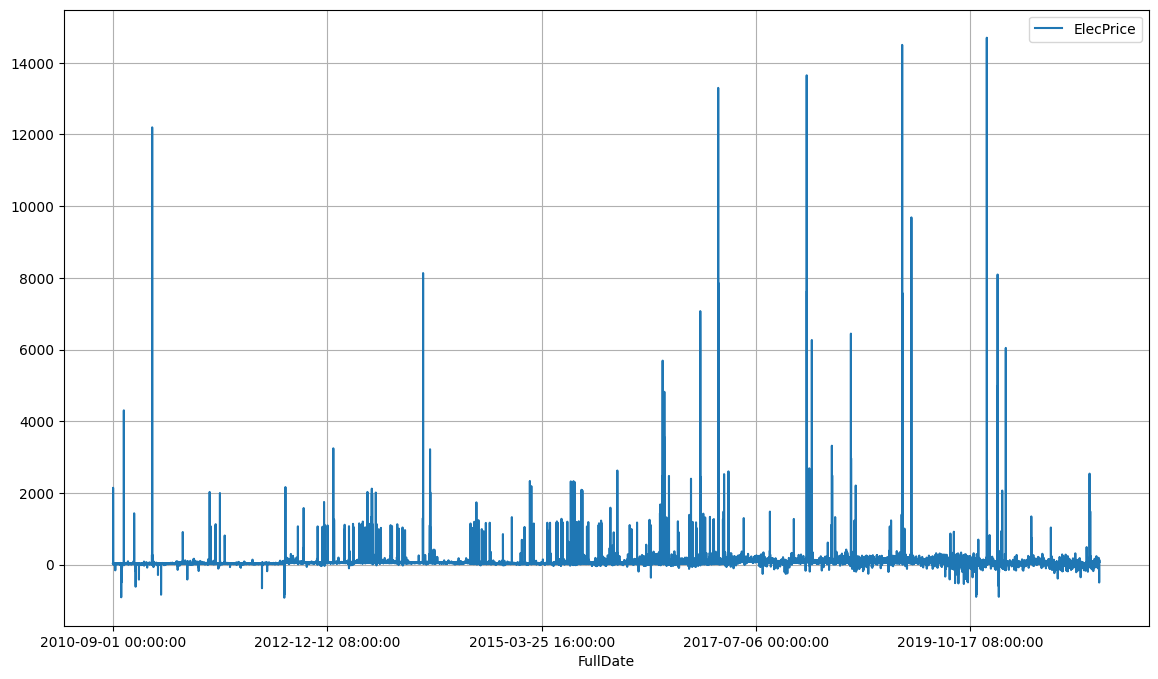

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [7]:
df1= pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")
plt.rcParams['figure.figsize'] = [14, 8]
df1.plot('FullDate','ElecPrice')
plt.grid()
plt.show()
df1.describe()

In [8]:
df.rename(columns={'FullDate':'ds','ElecPrice':'y'},inplace=True)
df['ds'] = pd.to_datetime(df['ds'])


In [9]:
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


Lets Plot this time-series..

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

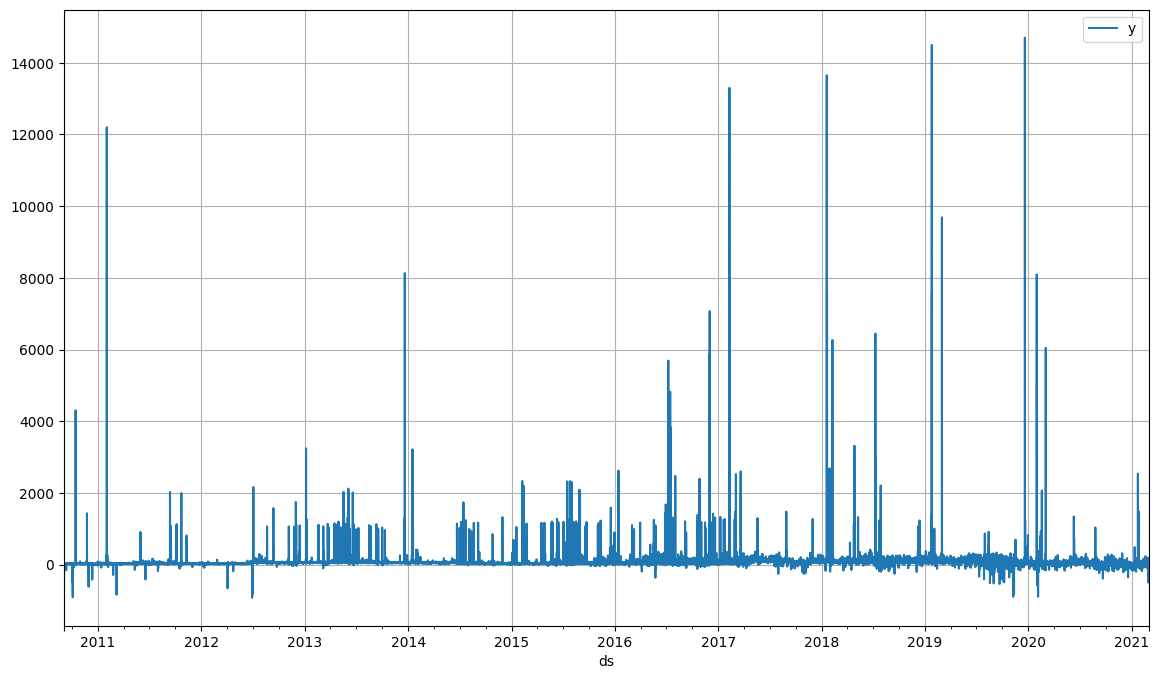

In [10]:
plt.rcParams['figure.figsize'] = [14, 8]
df.plot('ds','y')
plt.grid()
plt.show()

From the graph we can see that there is some outliers in the data

## Checking for missing values

In [ ]:
df.isna().sum()

Since there is no missing data we can proceed...

## Dataset preparation & train,test Splitting

In [11]:
df.set_index('ds',inplace=True)
df = df.resample('D').sum().reset_index()

train = df.iloc[:2757,:]
test = df.iloc[2757:,:].drop('y',axis=1)
md = Prophet()


<AxesSubplot: xlabel='ds'>

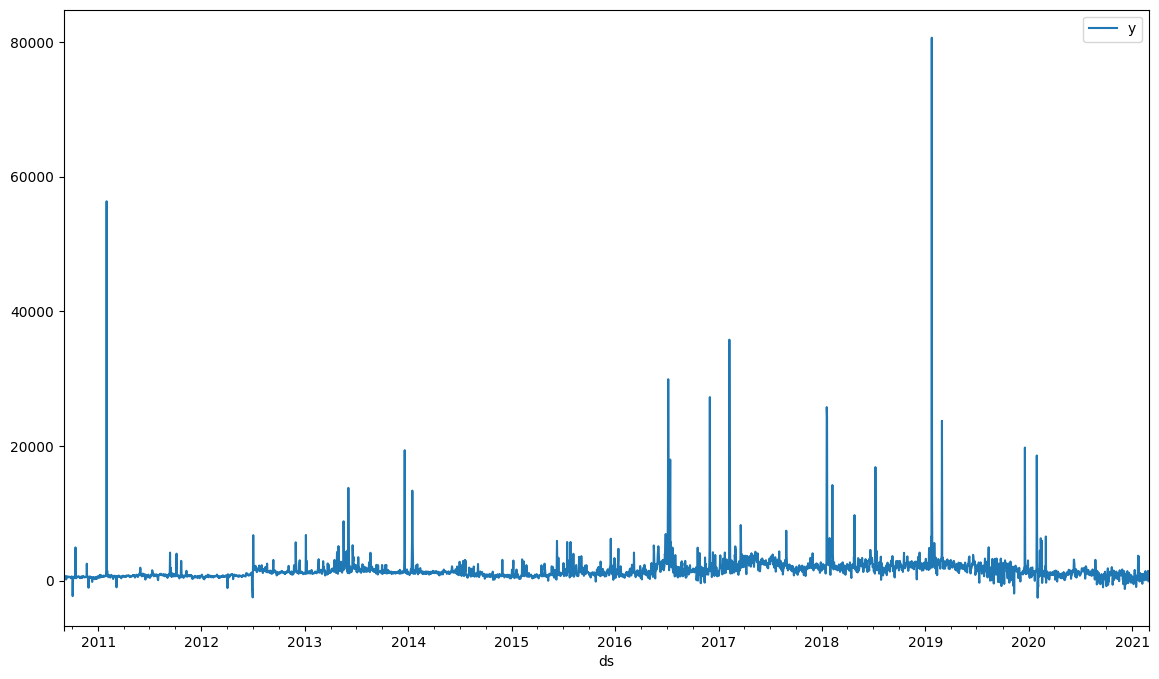

In [15]:
df.plot('ds','y')

Model Training & prediction

In [28]:
md.fit(train)

02:31:31 - cmdstanpy - INFO - Chain [1] start processing
02:31:31 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
pred = md.predict(test)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.799430,111.921437,4776.315649,2684.799430,2684.799430,-155.229589,-155.229589,-155.229589,9.738301,9.738301,9.738301,-164.967890,-164.967890,-164.967890,0.0,0.0,0.0,2529.569840
1,2018-03-21,2685.595004,391.427843,5116.456841,2685.595004,2685.595004,-2.715794,-2.715794,-2.715794,159.361120,159.361120,159.361120,-162.076914,-162.076914,-162.076914,0.0,0.0,0.0,2682.879210
2,2018-03-22,2686.390579,525.683161,5212.706695,2686.390579,2686.390579,95.496503,95.496503,95.496503,257.118925,257.118925,257.118925,-161.622421,-161.622421,-161.622421,0.0,0.0,0.0,2781.887082
3,2018-03-23,2687.186153,136.764895,4986.789526,2687.186153,2687.186153,-113.162769,-113.162769,-113.162769,50.275969,50.275969,50.275969,-163.438738,-163.438738,-163.438738,0.0,0.0,0.0,2574.023384
4,2018-03-24,2687.981728,-202.666258,4588.025632,2687.981728,2687.981728,-438.737441,-438.737441,-438.737441,-271.453689,-271.453689,-271.453689,-167.283752,-167.283752,-167.283752,0.0,0.0,0.0,2249.244287


Cross-validation...

In [30]:
df_cv = cross_validation(md,initial='1095 days',period='180 days',horizon='365 days')
df_cv.head()

  0%|          | 0/8 [00:00<?, ?it/s]

02:31:44 - cmdstanpy - INFO - Chain [1] start processing
02:31:44 - cmdstanpy - INFO - Chain [1] done processing
02:31:44 - cmdstanpy - INFO - Chain [1] start processing
02:31:44 - cmdstanpy - INFO - Chain [1] done processing
02:31:44 - cmdstanpy - INFO - Chain [1] start processing
02:31:44 - cmdstanpy - INFO - Chain [1] done processing
02:31:45 - cmdstanpy - INFO - Chain [1] start processing
02:31:45 - cmdstanpy - INFO - Chain [1] done processing
02:31:45 - cmdstanpy - INFO - Chain [1] start processing
02:31:45 - cmdstanpy - INFO - Chain [1] done processing
02:31:45 - cmdstanpy - INFO - Chain [1] start processing
02:31:46 - cmdstanpy - INFO - Chain [1] done processing
02:31:46 - cmdstanpy - INFO - Chain [1] start processing
02:31:46 - cmdstanpy - INFO - Chain [1] done processing
02:31:46 - cmdstanpy - INFO - Chain [1] start processing
02:31:46 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-10-07,2323.131039,129.011515,4670.560911,1296.745,2013-10-06
1,2013-10-08,1917.139576,-255.400549,3958.528943,1607.045,2013-10-06
2,2013-10-09,1925.106250,-259.231472,4245.205089,1153.445,2013-10-06
3,2013-10-10,1856.763622,-315.216991,4251.376399,2276.015,2013-10-06
4,2013-10-11,1970.906157,-319.299360,4161.210179,1982.305,2013-10-06


## Getting our model performance metrics

In [31]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,519481.324457,720.750529,489.094550,1.658452,0.309440,0.354633,0.988014
1,38 days,439369.529624,662.849553,479.183152,1.663435,0.313759,0.356113,0.991438
2,39 days,423483.834411,650.756356,483.559220,1.674522,0.322738,0.362046,0.993151
3,40 days,447971.019828,669.306372,495.064258,1.711535,0.331073,0.372543,0.989726
4,41 days,455956.238092,675.245317,500.784927,1.780999,0.336481,0.380419,0.989726


Q14

In [33]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.799430,111.921437,4776.315649,2684.799430,2684.799430,-155.229589,-155.229589,-155.229589,9.738301,9.738301,9.738301,-164.967890,-164.967890,-164.967890,0.0,0.0,0.0,2529.569840
1,2018-03-21,2685.595004,391.427843,5116.456841,2685.595004,2685.595004,-2.715794,-2.715794,-2.715794,159.361120,159.361120,159.361120,-162.076914,-162.076914,-162.076914,0.0,0.0,0.0,2682.879210
2,2018-03-22,2686.390579,525.683161,5212.706695,2686.390579,2686.390579,95.496503,95.496503,95.496503,257.118925,257.118925,257.118925,-161.622421,-161.622421,-161.622421,0.0,0.0,0.0,2781.887082
3,2018-03-23,2687.186153,136.764895,4986.789526,2687.186153,2687.186153,-113.162769,-113.162769,-113.162769,50.275969,50.275969,50.275969,-163.438738,-163.438738,-163.438738,0.0,0.0,0.0,2574.023384
4,2018-03-24,2687.981728,-202.666258,4588.025632,2687.981728,2687.981728,-438.737441,-438.737441,-438.737441,-271.453689,-271.453689,-271.453689,-167.283752,-167.283752,-167.283752,0.0,0.0,0.0,2249.244287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,2021-02-24,3537.655261,348.149273,6390.287170,1803.057345,5334.916003,-90.473879,-90.473879,-90.473879,159.361120,159.361120,159.361120,-249.835000,-249.835000,-249.835000,0.0,0.0,0.0,3447.181382
1073,2021-02-25,3538.450836,393.746872,6346.866784,1802.834550,5338.907875,-24.372178,-24.372178,-24.372178,257.118925,257.118925,257.118925,-281.491103,-281.491103,-281.491103,0.0,0.0,0.0,3514.078657
1074,2021-02-26,3539.246410,323.889582,6141.005864,1801.216493,5342.899747,-258.328138,-258.328138,-258.328138,50.275969,50.275969,50.275969,-308.604107,-308.604107,-308.604107,0.0,0.0,0.0,3280.918272
1075,2021-02-27,3540.041985,188.473487,5718.931351,1798.861845,5346.891620,-602.433585,-602.433585,-602.433585,-271.453689,-271.453689,-271.453689,-330.979896,-330.979896,-330.979896,0.0,0.0,0.0,2937.608400


In [36]:
import numpy as np
pred['ape'] = np.abs(pred['yhat'] - df['y']) / df['y']

# calculate the mean absolute percentage error
mape = pred['ape'].mean() * 100
mape

281.7911926822042

In [ ]:
# fig = plot_cross_validation_metric(df_cv,metric='mape')
md.plot(pred)

In [ ]:
md.plot_components(pred)

## Multi-variate Forcasting

In [46]:
m_mdl = Prophet()
m_mdl.add_regressor('SysLoad')
# m_mdl.add_regressor('Tmax')
m_mdl.add_regressor('GasPrice')
# m_mdl.drop
m_mdl.fit(train)

02:52:16 - cmdstanpy - INFO - Chain [1] start processing
02:52:16 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
m_pred = m_mdl.predict(test)
m_pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GasPrice,GasPrice_lower,GasPrice_upper,SysLoad,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1872.570210,-98.501903,4225.922224,1872.570210,1872.570210,1100.158914,1100.158914,1100.158914,-856.410362,...,-84.269507,-84.269507,-84.269507,-38.852536,-38.852536,-38.852536,0.0,0.0,0.0,1993.196718
1,2018-03-21,1873.274028,-242.472612,4335.971355,1873.274028,1873.274028,1124.604659,1124.604659,1124.604659,-1026.429827,...,42.711666,42.711666,42.711666,-29.524853,-29.524853,-29.524853,0.0,0.0,0.0,1984.635673
2,2018-03-22,1873.977846,632.647711,5175.366371,1873.977846,1873.977846,1124.604659,1124.604659,1124.604659,-214.967040,...,145.291515,145.291515,145.291515,-24.450643,-24.450643,-24.450643,0.0,0.0,0.0,2904.456337
3,2018-03-23,1874.681665,337.770369,4722.731931,1874.681665,1874.681665,1057.035917,1057.035917,1057.035917,-274.907593,...,-44.093375,-44.093375,-44.093375,-23.489038,-23.489038,-23.489038,0.0,0.0,0.0,2589.227575
4,2018-03-24,1875.385483,-819.266420,3641.285231,1875.385483,1875.385483,786.936819,786.936819,786.936819,-1076.476943,...,-117.821280,-117.821280,-117.821280,-26.389876,-26.389876,-26.389876,0.0,0.0,0.0,1441.634204


q17

In [44]:
import numpy as np
m_pred['ape'] = np.abs(m_pred['yhat'] - df['y']) / df['y']

# calculate the mean absolute percentage error
mape = m_pred['ape'].mean() * 100
mape

237.6645890022341

In [ ]:
q18

In [45]:
df['error'] = (m_pred['yhat'] - df['y'])**2
mse = df['error'].mean()
rmse = np.sqrt(mse)
rmse

2597.2765102146604

Q20

In [48]:
import numpy as np
m_pred['ape'] = np.abs(m_pred['yhat'] - df['y']) / df['y']

# calculate the mean absolute percentage error
mape = m_pred['ape'].mean() * 100
mape

238.16883191734598

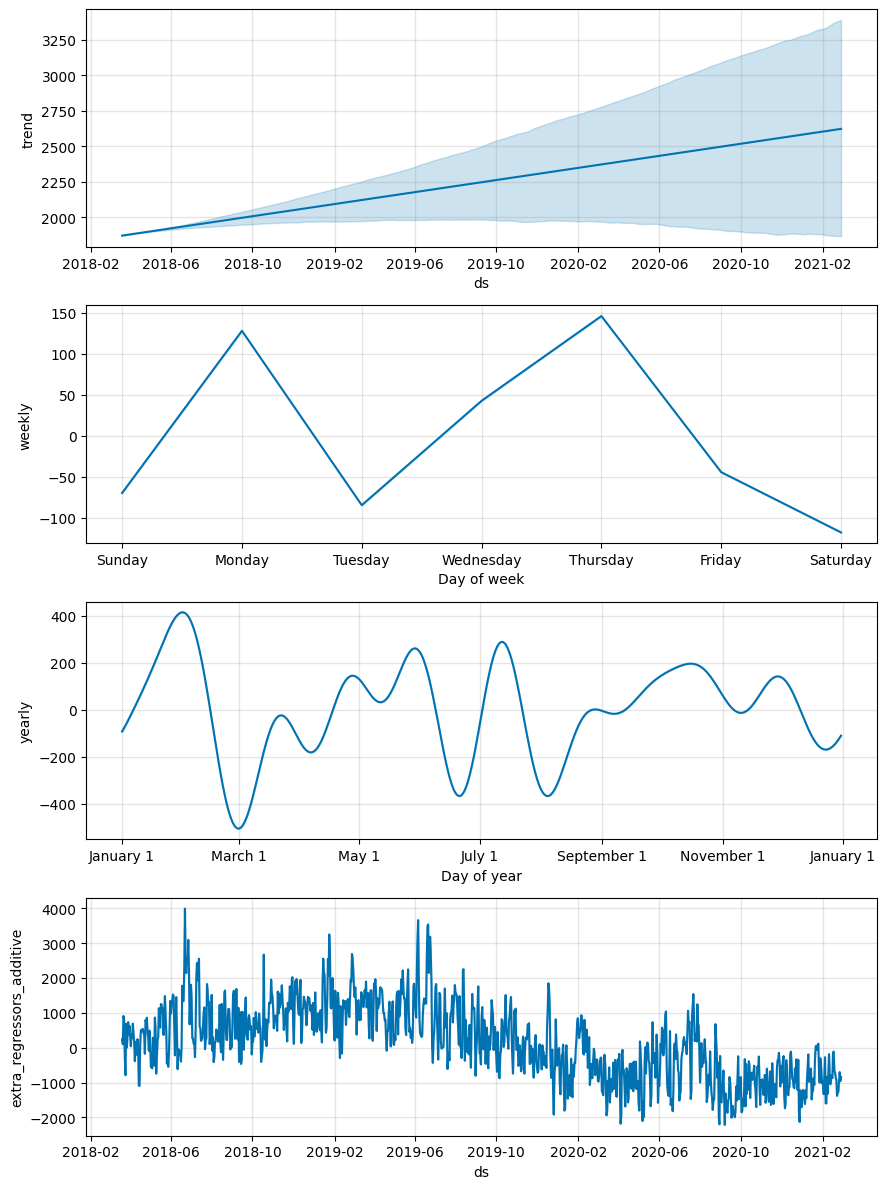

In [43]:
m_mdl.plot_components(m_pred);

Q12


In [26]:
from statsmodels.tsa.stattools import adfuller
pval = adfuller(df["GasPrice"])
pval[1]

4.848817773711457e-13

In [22]:
pval1 = adfuller(df["SysLoad"])
pval1[1]

0.004253725504574104

Q13

In [27]:
Gas = adfuller(df["GasPrice"])
elec = adfuller(df["y"])
Gas
elec

(-8.269053866873808,
 4.848817773711457e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 69130.36360776308)

Q15

In [37]:
df['error'] = (pred['yhat'] - df['y'])**2
mse = df['error'].mean()
rmse = np.sqrt(mse)
rmse

2783.521251867937

Q16

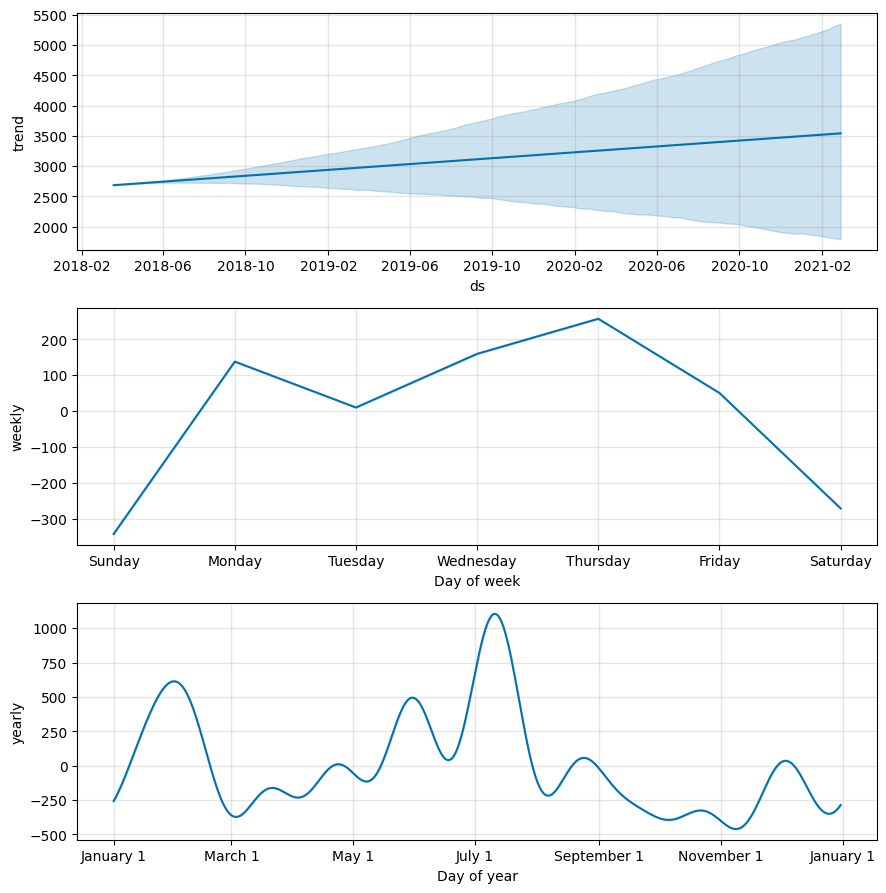

In [39]:
md.plot_components(pred);

Q17